<a href="https://colab.research.google.com/github/Vidumini1998/Music_Theraphy_Module/blob/main/MusicTherapyModuleDataPreprosessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Survey Dataset**

**Imporrt Data**

In [ ]:
from google.colab import drive

In [ ]:
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline 
from matplotlib import pyplot as plt
from matplotlib import ticker 
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import os
import re 
import nltk
import requests
import warnings
import matplotlib.pyplot as plt

**Read Data**

In [ ]:
music = pd.read_csv('/content/drive/MyDrive/FYP /New_datasets/Survey on an AI based tool to manage emotions using Music and Color therapy techniques   (Responses) - Form Responses 1 (1).csv')

**View All Data**

In [ ]:
music.head()

,Timestamp,"Please let us know of your age,",Your gender?,How would you describe yourself?,Your nationality?,Your nearest town?,Your hobby/s?,Marital status?,Number of people who're living with you at the moment?,Do you have any underlying medical conditions?,...,We would love to know your impression on the below colors. What emotions of yours do they trigger? [Happy],We would love to know your impression on the below colors. What emotions of yours do they trigger? [Sad],We would love to know your impression on the below colors. What emotions of yours do they trigger? [Angry],We would love to know your impression on the below colors. What emotions of yours do they trigger? [Relaxed],We would love to know your impression on the below colors. What emotions of yours do they trigger? [Exhausted],We would love to know your impression on the below colors. What emotions of yours do they trigger? [Romantic],We would love to know your impression on the below colors. What emotions of yours do they trigger? [Cheered up],How do you feel about using facial recognition feature in a mobile/ web application?,How keen are you on trying the facial recognition feature on an upcoming application?,How do you feel about using chatbots in a mobile/ web application?
0,12/27/2022 23:03:36,26 - 30,Male,Ambivert,Sri Lankan,Wattala,"Tinkering, Gaming, electronic designing",Not married,2.0,No,...,"Green, Pink","Orange, Black, White",Red,"Purple, White","Blue, Black","Red, Pink","Yellow, Green",Invasion of my privacy,1,1
1,12/27/2022 23:25:27,21 - 25,Female,Introvert,SriLankan,Kandy,"Singing, painting, reading",Not married,2.0,No,...,Pink,Blue,Red,Purple,White,Red,Yellow,Interesting,5,3
2,12/27/2022 23:31:19,31 - 35,Male,Ambivert,Sri Lankan,Colombo,"Guitar, Piano, Singing, Writing",Not married,0.0,No,...,Yellow,Black,Red,"Blue, Green",Purple,White,Orange,Invasion of my privacy,5,3
3,12/27/2022 23:38:25,21 - 25,Female,Extrovert,Sri Lankan,Warakapola,Listening songs & music,Not married,2.0,No,...,"Red, Black",White,Green,"Red, Yellow, Purple, Black",Pink,Red,"Blue, Black",Interesting,3,3
4,12/27/2022 23:40:54,26 - 30,Female,Introvert,Sinhalese,Kandy,"Listening to Music, Walking, Reading, Watching...",Not married,5.0,No,...,"Purple, Pink, White",White,Red,"Blue, Yellow, Purple, Pink, White",Black,"Red, Blue, White","Yellow, Orange",Interesting,4,1


**Size of the dataset**

In [ ]:
music.shape

(135, 44)

**Data Columns**

In [ ]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 44 columns):
 #   Column                                                                                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                                                                                    --------------  -----  
 0   Timestamp                                                                                                                                                                                 135 non-null    object 
 1   Please let us know of your age,                                                                                                                                                           135 non-null    object 
 2   Your gender?                  

**Description of the DataFrame**

In [ ]:
music.describe()

,Number of people who're living with you at the moment?,How often do you get mood swings at work/ office/ home?,What time of the day do you think you are most stressed out?,How effective it was to manage your moods/ emotions?,How keen are you on trying the facial recognition feature on an upcoming application?,How do you feel about using chatbots in a mobile/ web application?
count,123.000000,135.000000,132.000000,9.000000,135.000000,135.000000
mean,3.715447,5.400000,3.022727,2.444444,2.977778,3.177778
std,4.432592,2.165537,1.422104,1.424001,1.260577,1.158142
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,4.000000,2.000000,1.000000,2.000000,3.000000
50%,3.000000,5.000000,3.000000,2.000000,3.000000,3.000000
75%,4.000000,7.000000,4.000000,3.000000,4.000000,4.000000
max,50.000000,10.000000,5.000000,5.000000,5.000000,5.000000


**Checking for missing values**

In [ ]:
music.isnull().any().sum()

15

**Filling NaN values with forward fill value**

In [ ]:
new_filling = music.fillna(method="ffill")

In [ ]:
All = music.shape[0]
fraud = music[music['Do you usually listen to music or songs to manage your emotions? '] == 1]
nonFraud = music[music['Do you usually listen to music or songs to manage your emotions? '] == 0]

x = len(fraud)/All
y = len(nonFraud)/All

print('frauds :',x*100,'%')
print('non frauds :',y*100,'%')

frauds : 0.0 %
non frauds : 0.0 %


**Data Distributions**

Text(0, 0.5, 'Frequency')

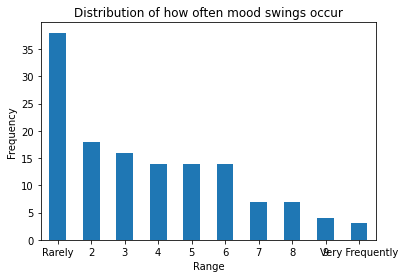

In [ ]:
labels = ['Rarely','2', '3', '4', '5', '6', '7', '8', '9', 'Very Frequently']
classes = pd.value_counts(music['How often do you get mood swings at work/ office/ home?'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Distribution of how often mood swings occur")
plt.xticks(range(10), labels)
plt.xlabel("Range")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

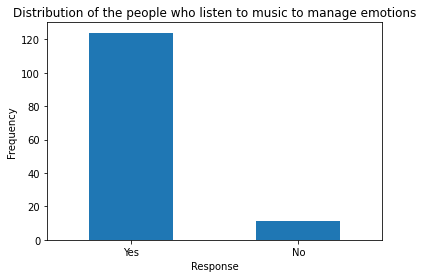

In [ ]:
labels = ['Yes','No']
classes = pd.value_counts(music['Do you usually listen to music or songs to manage your emotions? '], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Distribution of the people who listen to music to manage emotions")
plt.xticks(range(2), labels)
plt.xlabel("Response")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

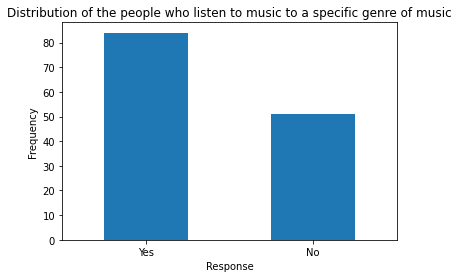

In [ ]:
labels = ['Yes','No']
classes = pd.value_counts(music['Do you listen to a specific type (genre) of music all the time?'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Distribution of the people who listen to music to a specific genre of music")
plt.xticks(range(2), labels)
plt.xlabel("Response")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

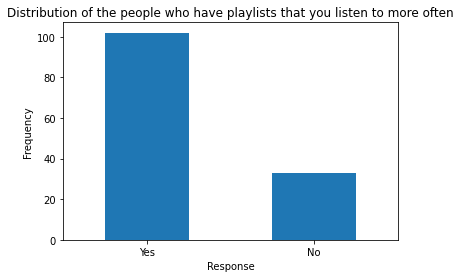

In [ ]:
labels = ['Yes','No']
classes = pd.value_counts(music['Do you have a playlist that you listen to more often?'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Distribution of the people who have playlists that you listen to more often")
plt.xticks(range(2), labels)
plt.xlabel("Response")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

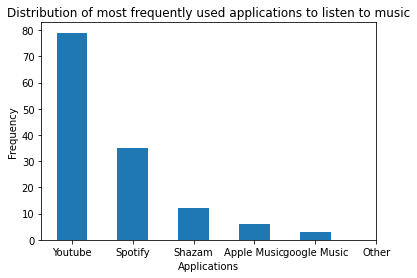

In [ ]:
labels = ['Youtube','Spotify', 'Shazam', 'Apple Music', 'google Music', 'Other']
classes = pd.value_counts(music["What's your most frequently used application to listen to music?"], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Distribution of most frequently used applications to listen to music")
plt.xticks(range(6), labels)
plt.xlabel("Applications")
plt.ylabel("Frequency")

**Checking for categorical data**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


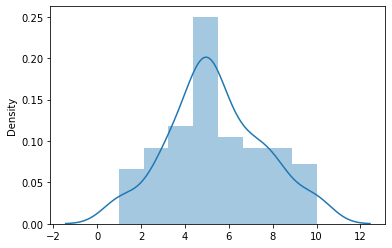

In [ ]:
moodswings = [music['How often do you get mood swings at work/ office/ home?'].values]
sns.distplot(moodswings)

In [ ]:
dfl = music.copy()

**Drop Columns**

In [ ]:
modified_music = dfl.drop(columns=['Timestamp', 'Marital status?', "Number of people who're living with you at the moment?", 'Do you have any underlying medical conditions?', "If yes, can we please know what's the underlying medical condition?", 'Do you take medications for any underlying medical conditions?','Number of hours spent at workplace/ university/ school per day (on a typical day in your weekend)?', 'We would love to know your impression on the below colors. What emotions of yours do they trigger? [Happy]', 'We would love to know your impression on the below colors. What emotions of yours do they trigger? [Sad]', 'We would love to know your impression on the below colors. What emotions of yours do they trigger? [Angry]', 'We would love to know your impression on the below colors. What emotions of yours do they trigger? [Relaxed]', 'We would love to know your impression on the below colors. What emotions of yours do they trigger? [Exhausted]', 'We would love to know your impression on the below colors. What emotions of yours do they trigger? [Romantic]', 'We would love to know your impression on the below colors. What emotions of yours do they trigger? [Cheered up]', 'How do you feel about using facial recognition feature in a mobile/ web application?', 'How keen are you on trying the facial recognition feature on an upcoming application?', 'How do you feel about using chatbots in a mobile/ web application?'])

**Modified Dataset**

In [ ]:
modified_music

,"Please let us know of your age,",Your gender?,How would you describe yourself?,Your nationality?,Your nearest town?,Your hobby/s?,Your occupation/s?,Number of hours spent at workplace/ university/ school per day (on a typical weekday)?,Working/ studying from home / from office or school?,How often do you get mood swings at work/ office/ home?,...,Do you have a playlist that you listen to more often?,What's your most frequently used application to listen to music?,Do you use a special music application to manage your emotions?,"If yes, please state the name of the specific music therapy application you use to manage your emotions?",What type of music you prefer to listen when you feel happy?,What are the songs you usually listen when you feel happy? (Mention a few song titles along with the singer of each song ex:- Something Just Like This - Coldplay and The Chainsmokers),What type of music you prefer to listen when you feel sad?,What are the songs you usually listen when you feel sad? (Mention a few song titles along with the singer of each song ex:- Lift Me Up - Rihanna),What type of music you prefer to listen when you feel angry?,What are the songs you usually listen when you feel angry? (Mention a few song titles along with the singer of each song ex:- Blank Space - Taylor Swift)
0,26 - 30,Male,Ambivert,Sri Lankan,Wattala,"Tinkering, Gaming, electronic designing",Engineer,9,Hybrid,7,...,Yes,Spotify,No,NaN,"Happy, Melody","Sunflower - spiderman, post malone",Mood fixing,NaN,Relaxing and calm,NaN
1,21 - 25,Female,Introvert,SriLankan,Kandy,"Singing, painting, reading",Student,2,Working/ studying from Home,9,...,No,YouTube,No,No,Don't listen to any music,I don’t listen to music when I’m happy,Sad,Old Sinhala songs,Don't listen to any music,NaN
2,31 - 35,Male,Ambivert,Sri Lankan,Colombo,"Guitar, Piano, Singing, Writing",Engineer/ Teacher,8-10 hours,Hybrid,1,...,Yes,YouTube,No,NaN,Happy,"Now: ""Nee Kavithaigala""",Happy,"""Nenje Nenje Maranthuvidu""",Relaxing and calm,"""Janagana mana"""
3,21 - 25,Female,Extrovert,Sri Lankan,Warakapola,Listening songs & music,University Student,8,Working/ studying from Home,5,...,Yes,Other,No,NaN,Happy,NaN,Mood fixing,NaN,Relaxing and calm,NaN
4,26 - 30,Female,Introvert,Sinhalese,Kandy,"Listening to Music, Walking, Reading, Watching...","Student, Associate software engineer",8hrs,Hybrid,8,...,Yes,Spotify,No,NaN,"Happy, Hyper",NaN,"The music which make you boost up, Happy, Mood...",NaN,Don't listen to any music,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,51 or above,Female,Ambivert,Sri Lankan,Kegalle,"Watching TV, Listening to Music",Teaching,8,Working/ studying from Office or school,4,...,Yes,YouTube,No,NaN,Happy,"Songs of T.M. Jayarathna, Sunil Edirisinghe",Don't listen to any music,NaN,Don't listen to any music,NaN
131,26 - 30,Male,Ambivert,Srilankan,Kegalle,Thinking and Designing,Architect,18 hrs,Hybrid,7,...,No,YouTube,No,NaN,Happy,Something Just Like This - Coldplay and The Ch...,"The music which make you boost up, Happy",Something Just Like This - Coldplay and The Ch...,Relaxing and calm,Something Just Like This - Coldplay and The Ch...
132,21 - 25,Female,Extrovert,Sri lankan,Kadawatha,"LiListening to music , dancing , food testing",Student,8 hours,Hybrid,7,...,Yes,Spotify,Yes,Spotify,"Happy, Rock",Title /stero,"The music which make you boost up, Happy, Mood...",Karnatic,Angry,Dark hours - katty perry
133,21 - 25,Female,Ambivert,Srilankan,Ruwanwella,"Cooking, Gardening, Watching movies, Reading n...",Until Studying,Minimum 4 hours,Working/ studying from Office or school,6,...,Yes,Google Music,No,NaN,"Happy, Hyper",Sanda kumari mage manali- Nadee \nAlawantha ne...,Sad,Santhana susum dawata- Suneera\nMal onchilla- ...,Don't listen to any music,NaN


# **Song Moods Dataset**

**Import Data**


In [ ]:
songs = pd.read_csv('/content/drive/MyDrive/FYP /New_datasets/Song_moods.csv')

In [ ]:
songs.head()

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,4,Energetic


**Size of the Dataset**

In [ ]:
songs.shape

(686, 19)

**Data Columns**

In [ ]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              686 non-null    object 
 1   album             686 non-null    object 
 2   artist            686 non-null    object 
 3   id                686 non-null    object 
 4   release_date      686 non-null    object 
 5   popularity        686 non-null    int64  
 6   length            686 non-null    int64  
 7   danceability      686 non-null    float64
 8   acousticness      686 non-null    float64
 9   energy            686 non-null    float64
 10  instrumentalness  686 non-null    float64
 11  liveness          686 non-null    float64
 12  valence           686 non-null    float64
 13  loudness          686 non-null    float64
 14  speechiness       686 non-null    float64
 15  tempo             686 non-null    float64
 16  key               686 non-null    int64  
 1

**Description of the DataFrame**

In [ ]:
songs.describe()

,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,41.534985,221791.485423,0.500553,0.449749,0.507693,0.349610,0.166867,0.342438,-11.531020,0.053946,119.134679,5.335277,3.870262
std,23.045707,63399.058492,0.158955,0.410729,0.326490,0.410517,0.142128,0.252304,7.468629,0.041374,28.978685,3.550858,0.500297
min,0.000000,76773.000000,0.078900,0.000005,0.001290,0.000000,0.031800,0.035300,-42.018000,0.023200,50.960000,0.000000,1.000000
25%,30.000000,179114.500000,0.388000,0.014825,0.202000,0.000034,0.092500,0.131250,-15.858750,0.033200,99.008750,2.000000,4.000000
50%,47.000000,213273.000000,0.505000,0.359000,0.495500,0.026350,0.111000,0.282000,-9.358000,0.040700,120.071000,6.000000,4.000000
75%,57.000000,254569.750000,0.612000,0.905750,0.844000,0.858250,0.173750,0.508750,-5.634500,0.057375,132.953250,9.000000,4.000000
max,88.000000,518373.000000,0.941000,0.996000,0.994000,0.966000,0.963000,0.977000,1.342000,0.416000,217.950000,11.000000,5.000000


**Checking for missing values**

In [ ]:
songs.isnull().sum()

name                0
album               0
artist              0
id                  0
release_date        0
popularity          0
length              0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
valence             0
loudness            0
speechiness         0
tempo               0
key                 0
time_signature      0
mood                0
dtype: int64

**Data Distributions**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


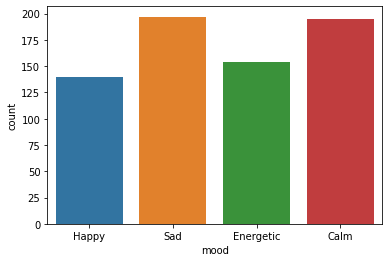

In [ ]:
sns.countplot(songs['mood'])

**Checking for categorical data**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


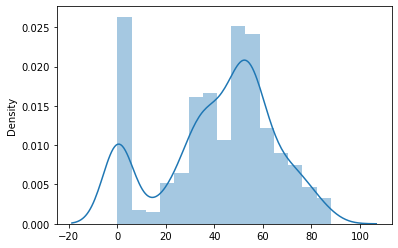

In [ ]:
popularity = [songs['popularity'].values]
sns.distplot(popularity)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


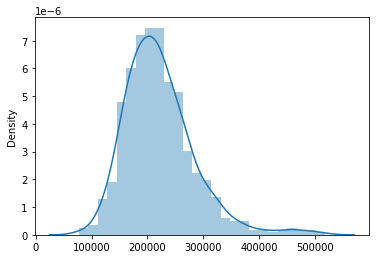

In [ ]:
length = songs['length'].values
sns.distplot(length)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


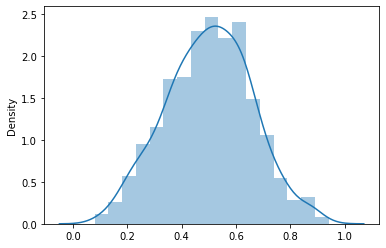

In [ ]:
danceability = songs['danceability'].values
sns.distplot(danceability)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


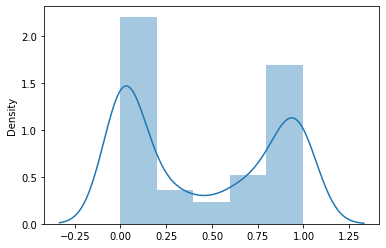

In [ ]:
acousticness = songs['acousticness'].values
sns.distplot(acousticness)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


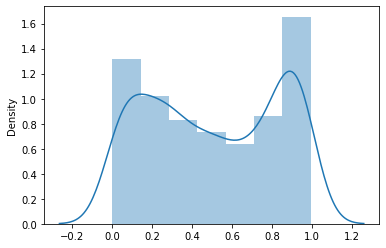

In [ ]:
energy = songs['energy'].values
sns.distplot(energy)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


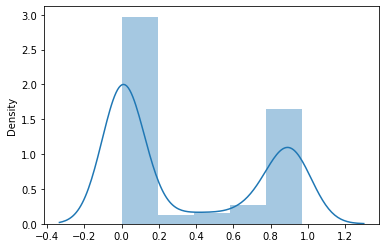

In [ ]:
instrumentalness = songs['instrumentalness'].values
sns.distplot(instrumentalness)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


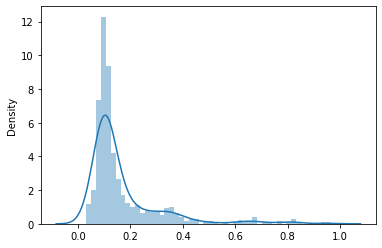

In [ ]:
liveness = songs['liveness'].values
sns.distplot(liveness)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


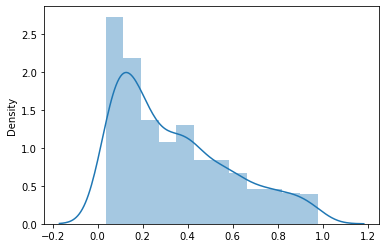

In [ ]:
valence = songs['valence'].values
sns.distplot(valence)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


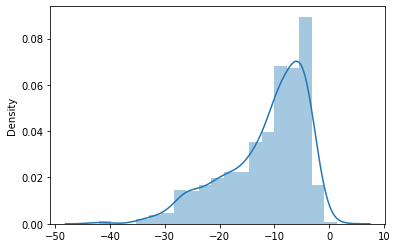

In [ ]:
loudness = songs['loudness'].values
sns.distplot(loudness)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


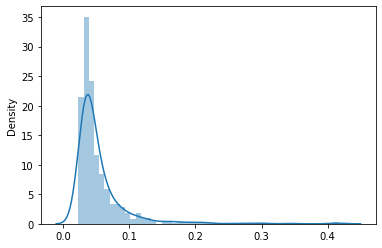

In [ ]:
speechiness = songs['speechiness'].values
sns.distplot(speechiness)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


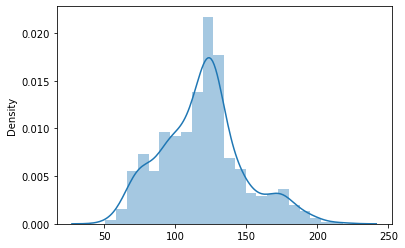

In [ ]:
tempo = songs['tempo'].values
sns.distplot(tempo)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


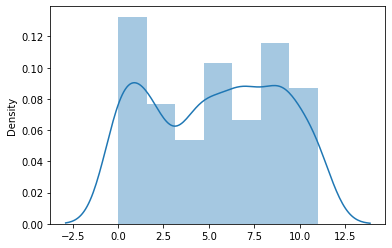

In [ ]:
key = songs['key'].values
sns.distplot(key)